In [3]:
ods noproctitle;
ods select attributes variables;  /* attributes : meat info of dataset *//*variable: list and describe variable schema*/

proc datasets ;
	contents data=SASHELP.CITIDAY order=collate;
quit;

In [9]:

proc sql ;
	select "DATE" label="Date variable", min(DATE) 
		format=DATE9. label="Minimum date" , max(DATE) 
		format=DATE9. label="Maximum date" from SASHELP.CITIDAY;
quit;



Date variable,Minimum date,Maximum date
DATE,01JAN1988,05FEB1992



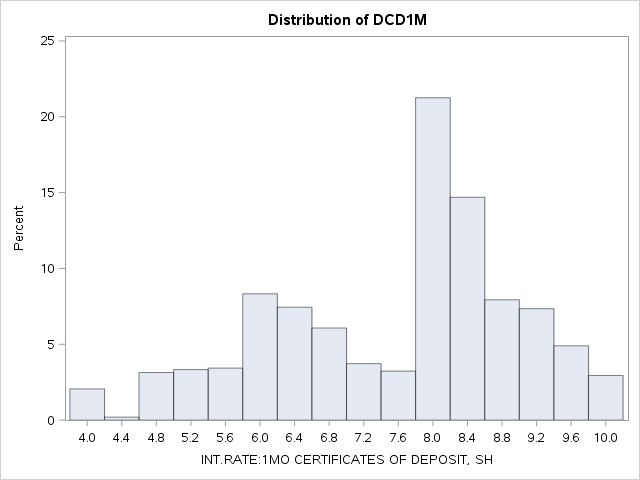

In [10]:
title "Descriptive Statistics for Numeric Variables";

proc means data=SASHELP.CITIDAY n nmiss min mean median max std;
	var DCD1M;
run;

title;

proc univariate data=SASHELP.CITIDAY noprint;
	histogram DCD1M;
run;

In [ ]:
ods noproctitle;proc sort data=SASHELP.HEART out=WORK.SORTTempTableSorted;
	by Weight_Status;
run;

proc transpose data=WORK.SORTTempTableSorted out=WORK.Transpose prefix=Column;
	var Smoking_Status;
	by Weight_Status;
run;

proc delete data=WORK.SORTTempTableSorted;
run;

proc sort data=SASHELP.HEART out=Work.SORTTempTableSorted;
	by Sex;
run;

proc format ;
	value _nmissprint low-high="Non-missing";
	value $_cmissprint " "=" " other="Non-missing";
run;

proc freq data=WORK.SORTTempTableSorted;
	title3 "Missing Data Frequencies";
	title4 h=2 "Legend: ., A, B, etc = Missing";
	format AgeCHDdiag AgeAtDeath _nmissprint.;
	format DeathCause Chol_Status $_cmissprint.;
	tables DeathCause AgeCHDdiag Chol_Status AgeAtDeath / missing nocum;
	by Sex;
run;

proc freq data=WORK.SORTTempTableSorted noprint;
	table DeathCause * AgeCHDdiag * Chol_Status * AgeAtDeath / missing 
		out=Work._MissingData_;
	format AgeCHDdiag AgeAtDeath _nmissprint.;
	format DeathCause Chol_Status $_cmissprint.;
	by Sex;
run;

proc print data=Work._MissingData_ noobs label;
	title3 "Missing Data Patterns across Variables";
	title4 h=2 "Legend: ., A, B, etc = Missing";
	format AgeCHDdiag AgeAtDeath _nmissprint.;
	format DeathCause Chol_Status $_cmissprint.;
	label count="Frequency" percent="Percent";
run;

title3;

/*** Clean up ***/
proc delete data=Work._MissingData_;
run;

proc delete data=Work.SORTTempTableSorted;
run;